In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


EDA - Which parameter values correspond with higher or lower values of call volume?


In [96]:
#df = pd.read_csv('~/Desktop/calls_weather_tfk.csv')
df = pd.read_csv('../data/hourlycalls_weather_traffic.csv')
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25465 entries, 0 to 25464
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      25465 non-null  int64  
 1   month                     25465 non-null  int64  
 2   day                       25465 non-null  int64  
 3   hour                      25465 non-null  int64  
 4   num_calls                 25465 non-null  int64  
 5   BRONX                     25465 non-null  int64  
 6   BROOKLYN                  25465 non-null  int64  
 7   MANHATTAN                 25465 non-null  int64  
 8   QUEENS                    25465 non-null  int64  
 9   RICHMOND / STATEN ISLAND  25465 non-null  int64  
 10  UNKNOWN                   25465 non-null  int64  
 11  STATION                   25465 non-null  object 
 12  NAME                      25465 non-null  object 
 13  DATE                      25465 non-null  object 
 14  AWND  

In [97]:
df['num_calls'].describe()

count    25465.000000
mean       136.328569
std         54.236394
min          3.000000
25%         88.000000
50%        128.000000
75%        184.000000
max        429.000000
Name: num_calls, dtype: float64

The quartiles are: 3-88 calls, 89-128 calls, 129-184 calls, and 184-429 calls.

In [98]:
calls = list(df['num_calls'])
quartiles = []
for c in calls:
    if c<=88:    quartiles.append(1)
    elif c<=128: quartiles.append(2)
    elif c<=184: quartiles.append(3)
    elif c<=429: quartiles.append(4)
df['quartile'] = quartiles

In [100]:
cols = ['num_calls', 'hour', 'TAVG_CALC', 'Traffic Incidents', 'day', 'month', 'PRCP', 'SNWD', 'SNOW']
df[df['quartile']==1][cols].describe()

,num_calls,hour,TAVG_CALC,Traffic Incidents,day,month,PRCP,SNWD,SNOW
count,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000
mean,73.295172,4.279836,56.067340,5.566657,15.877467,6.492104,0.144763,0.433556,0.088415
std,9.722077,1.551410,16.545269,4.129808,8.730941,3.417186,0.420715,2.135681,0.866570
min,3.000000,1.000000,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,66.000000,3.000000,43.000000,3.000000,8.000000,4.000000,0.000000,0.000000,0.000000
50%,74.000000,4.000000,57.000000,5.000000,16.000000,6.000000,0.000000,0.000000,0.000000
75%,81.000000,6.000000,70.000000,7.000000,23.000000,10.000000,0.050000,0.000000,0.000000
max,88.000000,11.000000,94.000000,34.000000,31.000000,12.000000,5.810000,23.000000,27.300000


In [101]:
df.groupby('quartile')[['num_calls']].describe()

num_calls                                                          
             count        mean        std    min    25%    50%    75%    max
quartile                                                                    
1           6586.0   73.295172   9.722077    3.0   66.0   74.0   81.0   88.0
2           6195.0  106.184019  11.551448   89.0   96.0  105.0  116.0  128.0
3           6318.0  157.022159  16.438751  129.0  143.0  157.0  172.0  184.0
4           6366.0  210.337575  19.326652  185.0  195.0  207.0  222.0  429.0

In [102]:
chk = df.groupby('quartile')[cols].mean()
chk.columns = ['call volume', 'hour', 'temperature', 'traffic incidents', 'day', 'month', 'precipitation', 'snow depth', 'snowfall']
print('Averages for each quartile of call volume:')
chk

Averages for each quartile of call volume:


,call volume,hour,temperature,traffic incidents,day,month,precipitation,snow depth,snowfall
quartile,,,,,,,,,
1,73.295172,4.279836,56.067340,5.566657,15.877467,6.492104,0.144763,0.433556,0.088415
2,106.184019,4.732688,59.072881,4.718805,15.779500,6.614689,0.127019,0.356158,0.073801
3,157.022159,9.344096,57.874802,6.286800,15.829218,6.252770,0.137167,0.365654,0.092308
4,210.337575,12.408420,59.448790,10.153629,15.304430,5.989161,0.126588,0.453063,0.093230


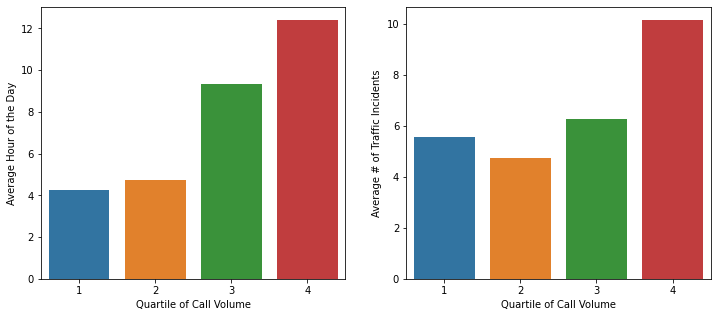

In [104]:
fig = plt.figure(figsize=(12,5));
ax = fig.add_subplot(121);
sns.barplot(x=df['quartile'], y=df['hour'], ci=None);
plt.xlabel('Quartile of Call Volume');
plt.ylabel('Average Hour of the Day');
ax = fig.add_subplot(122);
sns.barplot(x=df['quartile'], y=df['Traffic Incidents'], ci=None);
plt.xlabel('Quartile of Call Volume');
plt.ylabel('Average # of Traffic Incidents');


Time of day and number of traffic events both seem important to call volume.

In [105]:
def plot_impact(col,col_label,y_tickvalues,y_offset):

    Qcol_label = col_label + ' Quartile'

    c = df[col].describe()
    Q_tops = [c['25%'], c['50%'], c['75%'], c['max']]
    ranges = [f'{c["min"]}-{c["25%"]}', f'{c["25%"]}-{c["50%"]}', f'{c["50%"]}-{c["75%"]}', f'{c["75%"]}-{c["max"]}']

    value_list = list(df[col])
    quartiles = []
    for v in value_list:
        if   v<=Q_tops[0]: quartiles.append(1)
        elif v<=Q_tops[1]: quartiles.append(2)
        elif v<=Q_tops[2]: quartiles.append(3)
        elif v<=Q_tops[3]: quartiles.append(4)

    X = df.copy()[['num_calls', col]]
    X[Qcol_label] = quartiles

    fig = plt.figure(figsize=(12,5));
    ax = fig.add_subplot(121);

    quartile_calls = np.array(X.groupby(Qcol_label)['num_calls'].mean())
                                  
    sns.barplot(x=ranges, y=quartile_calls - y_offset, ci=None);
    plt.xlabel(col_label);
    plt.yticks(np.array(y_tickvalues)-y_offset, labels=y_tickvalues);
    plt.title('AVERAGE NUMBER OF CALLS PER HOUR');

    sizes = quartile_calls*100/sum(quartile_calls)
    ax = fig.add_subplot(122);
    plt.pie(sizes, explode=[0.05]*4, labels=ranges, autopct='%1.1f%%',
                shadow=True, startangle=90);
    plt.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('PERCENT OF TOTAL CALLS');

    # https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

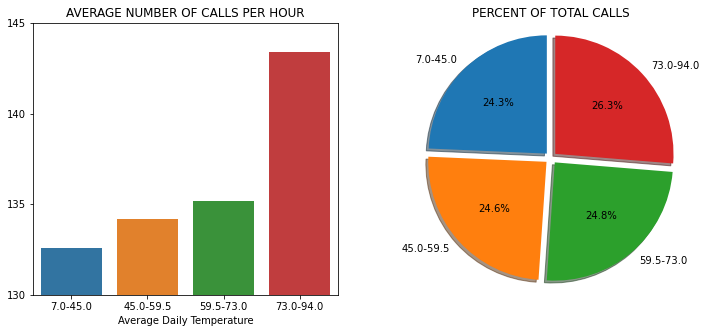

In [106]:
plot_impact('TAVG_CALC','Average Daily Temperature',[130, 135, 140, 145],130)

Temperature has a clear impact, but it is a smaller effect -- only moves the average number of calls a smaller amount.

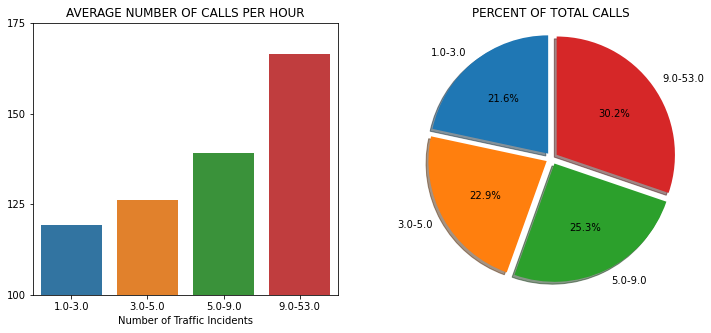

In [108]:
plot_impact('Traffic Incidents','Number of Traffic Incidents',[100, 125, 150, 175],100)

Traffic seems to have a pretty big impact.

In [145]:
def plot_impact_uni(col,col_label,y_tickvalues,y_offset):

    Qcol_label = col_label + ' Quartile'


    delta_range = df['hour'].max()-df['hour'].min()
    c = np.array([0, 0.25, 0.5, 0.75, 1])*(delta_range) + df['hour'].min()
    Q_tops = [c[1], c[2], c[3], c[4]]
    ranges = [f'{c[0]}-{np.floor(c[1])}',
              f'{np.ceil(c[1])}-{np.floor(c[2])}', 
              f'{np.ceil(c[2])}-{np.floor(c[3])}', 
              f'{np.ceil(c[3])}-{c[4]}']

    value_list = list(df[col])
    quartiles = []
    for v in value_list:
        if   v<=Q_tops[0]: quartiles.append(1)
        elif v<=Q_tops[1]: quartiles.append(2)
        elif v<=Q_tops[2]: quartiles.append(3)
        elif v<=Q_tops[3]: quartiles.append(4)

    X = df.copy()[['num_calls', col]]
    X[Qcol_label] = quartiles

    fig = plt.figure(figsize=(12,5));
    ax = fig.add_subplot(121);

    quartile_calls = np.array(X.groupby(Qcol_label)['num_calls'].mean())
                                  
    sns.barplot(x=ranges, y=quartile_calls - y_offset, ci=None);
    plt.xlabel(col_label);
    plt.yticks(np.array(y_tickvalues)-y_offset, labels=y_tickvalues);
    plt.title('AVERAGE NUMBER OF CALLS PER HOUR');

    sizes = quartile_calls*100/sum(quartile_calls)
    ax = fig.add_subplot(122);
    plt.pie(sizes, explode=[0.05]*4, labels=ranges, autopct='%1.1f%%',
                shadow=True, startangle=90);
    plt.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('PERCENT OF TOTAL CALLS');

    # https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

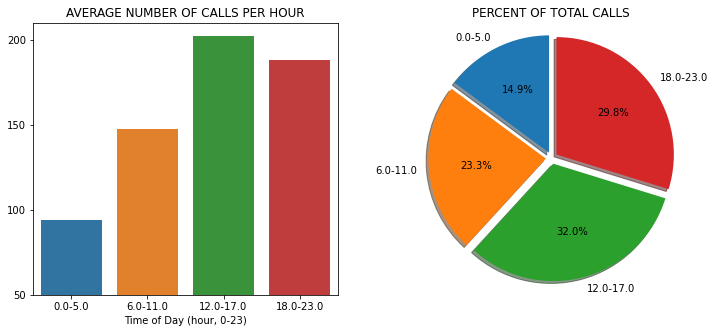

In [151]:
plot_impact_uni('hour','Time of Day (hour, 0-23)',[50, 100, 150, 200],50)

Time of day has the largest and clearest impact.

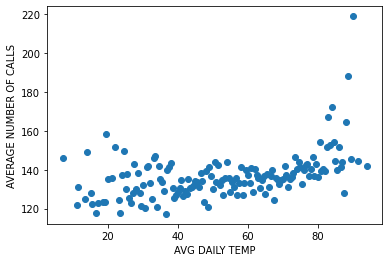

In [152]:
chk0 = df['TAVG_CALC'].unique()
chk0.sort()
chk1 = df.groupby('TAVG_CALC')['num_calls'].mean()
plt.scatter(chk0,chk1);
plt.xlabel('AVG DAILY TEMP');
plt.ylabel('AVERAGE NUMBER OF CALLS');


The impact of temperature is confusing -- it looks like calls can increase due to extreme temperatures either high or low-- nonlinear!

In [136]:
def plot_impact_bin(col,col_label,y_tickvalues,y_offset):

    value_list = list(df[col])
    bins = []
    for v in value_list:
        if   v==0: bins.append(0)
        else:      bins.append(1)

    X = df.copy()[['num_calls', col]]
    X[col_label] = bins

    fig = plt.figure(figsize=(12,4));
    ax = fig.add_subplot(131);

    bin_calls = np.array(X.groupby(col_label)['num_calls'].mean())
                                  
    sns.barplot(x=[0,1], y=bin_calls - y_offset, ci=None);
    plt.xlabel(col_label);
    plt.yticks(np.array(y_tickvalues)-y_offset, labels=y_tickvalues);
    plt.title('AVERAGE NUMBER OF CALLS PER HOUR');

    sizes = bin_calls*100/sum(bin_calls)
    ax = fig.add_subplot(132);
    plt.pie(sizes, explode=[0.05]*2, labels=[0,1], autopct='%1.1f%%',
                shadow=True, startangle=90);
    plt.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('PERCENT OF TOTAL CALLS');

    ax = fig.add_subplot(133);
    plt.hist(df[col],50);
    plt.xlabel(col_label);
    
    # https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

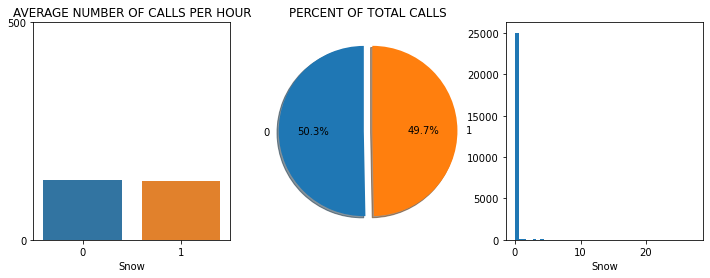

In [137]:
plot_impact_bin('SNOW','Snow',[0, 500],0)

Negligible impact

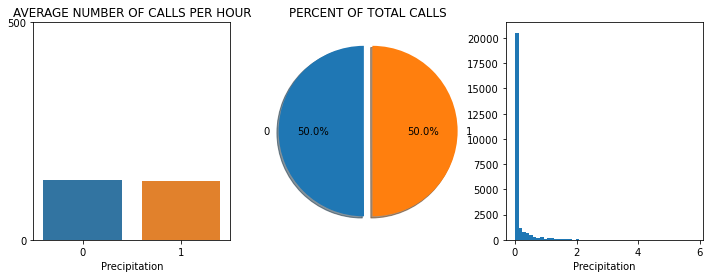

In [138]:
plot_impact_bin('PRCP','Precipitation',[0, 500],0)

Negligible impact

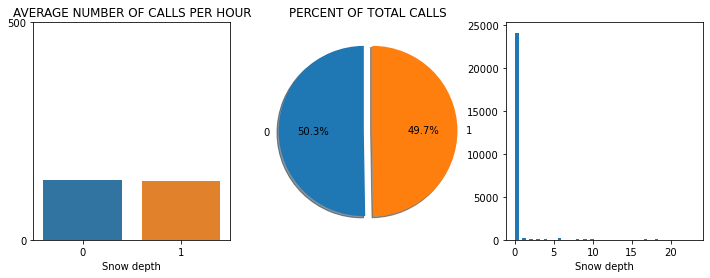

In [157]:
plot_impact_bin('SNWD','Snow depth',[0, 500],0)

Negligible impact

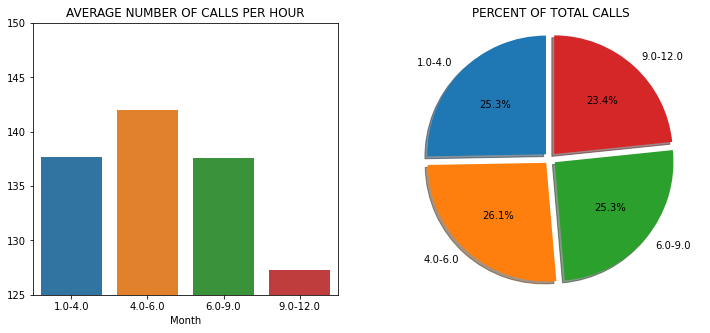

In [156]:
plot_impact('month','Month',[125, 130, 135, 140, 145, 150],125)

Very small impact.